In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta as ta
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from kd_smoother import get_data,Strategy
# plt.style.use('seaborn')
df_dict = {}

In [2]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
               'XRP','DYDX','AVAX','LINK','GAS',
               'DOGE','ORDI','TRB','WLD','ADA',
               'OP','FIL','ZRX','LTC','RUNE','ATOM',
               'ARB','GMT','ETC','ARK','BCH','DOT',
               'LDO','SUI','GALA','CAKE',
               'APE','INJ','FTM','APT','YFI','OMG',
               'SEI','EOS','1000SHIB','NEAR',
               'MKR','CYBER','UNI',
               'BLUR','SUSHI','WAVES','MASK','MANA',
               'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')

APY: 206.75 %
MDD: 19.66 %
MDD Duration 105 days 12:00:00
worst trade: -16.62 %
2023-01-18 22:00:00 ~ 2023-01-23 10:00:00
avg holding days: 5.24 days
--------------------------------------------
PF: 2.23
Sharpe Ratio: 2.31
Calmar Ratio: 6.72
Sortino Ratio: 3.48
Omega Ratio: 1.09
--------------------------------------------
Expectancy : 3.45 %
Total Time Exposure : 86.75 %
Total Trades: 114
Win Rate: 49.56 %
--------------------------------------------
PF * Win Rate: 1.105


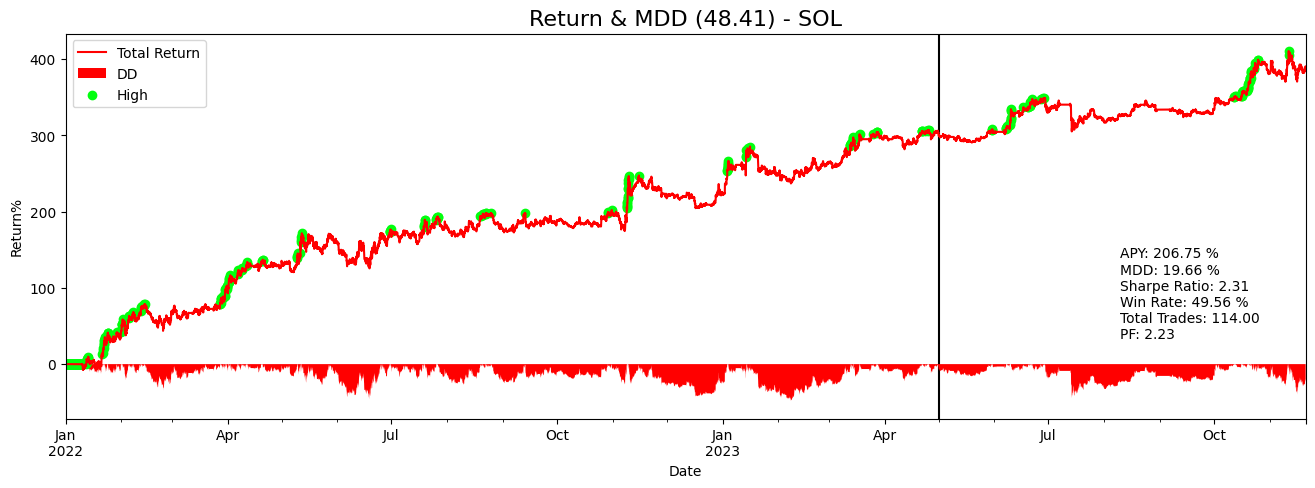

(None,
 Start                               2022-01-01 00:00:00
 End                                 2023-11-21 00:00:00
 Period                                689 days 01:00:00
 Start Value                                     10000.0
 Min Value                                   9268.853623
 Max Value                                  51065.269475
 End Value                                  49027.915757
 Total Return [%]                             390.279158
 Benchmark Return [%]                         -67.167633
 Total Time Exposure [%]                       86.750922
 Max Gross Exposure [%]                       105.785312
 Max Drawdown [%]                              19.662639
 Max Drawdown Duration                 105 days 12:00:00
 Total Orders                                        217
 Total Fees Paid                               681.45288
 Total Trades                                        114
 Win Rate [%]                                  49.557522
 Best Trade [%]         

In [6]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'

params = {"window_k":120,"window_d":96}


config = {'freq':'1h', 'lag':1, 'fee': 0.0003,'weekend_filter':False}
coin = 'SOL'

# 15min : INJ{'window_k': 72, 'window_d': 132}long
# 15min : INJ{'window_k': 236, 'window_d': 120}long
# 1h : INJ{'window_k': 88, 'window_d': 72}long
# 1h : INJ{'window_k': 90, 'window_d': 64}long
# 4h : INJ{'window_k': 28, 'window_d': 28}long
# 4h : INJ{'window_k': 4, 'window_d': 32}both


df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_trades_analysis(trades)
# analyze.plot_ret_dist(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

### 多參數

In [5]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['SOL'] #,'XRP']
sample_sets = [[start,end]]
freq = '1h'
config = {'freq':freq,'fee': 0.0003,'weekend_filter':False}

params = {'window_k': [4,200,4], 
          'window_d': [4,200,4],
          "window_s_k": [4,200,200],
          "window_s_d": [4,200,200]}


multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    df_dict=df_dict,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)

======================= SOL BOTH Optimize Test =======================
Optimization trails: 2401


100%|██████████| 2401/2401 [00:55<00:00, 43.11it/s]


Optimization time: 55.97 sec
---------- SOL BOTH ----------
{'window_k': 120, 'window_d': 96, 'window_s_k': 4, 'window_s_d': 4}
+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |    109.94 | 12950.7  | -1956.51 |       6.62 |   69.23 |         13 |
| 2022-06    |     57.99 | 10971.2  | -5172.23 |       2.12 |   53.33 |         15 |
| 2022-09    |     17.35 |  5484.59 | -3749.37 |       1.46 |   50    |         14 |
| 2022-12    |     76.03 | 13494.4  | -5891.24 |       2.29 |   36.84 |         19 |
| 2023-03    |     33.63 |  8752.83 | -5389.7  |       1.62 |   44.44 |         18 |
| 2023-06    |      3.74 |  2050.79 | -1676.49 |       1.22 |   50    |          6 |
+------------+-----------+----------+----------+------------+---------+------------+
